<a href="https://colab.research.google.com/github/MariuszGrecki/Machine_learning_tutorial/blob/main/classification/03_gini_entropy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Klasyfikacja - drzewa decyzyjne,

entropia i wskaxnik ginniego (gini) pozwala znaleźc zaszumienie danych (zbiór drugi 1 kot i 3 psy nie jest czysty)

Grafy drzewa decyzyjnego

4 koty i 3 psy - korzeń drzewa


podział - węzeł


jeżeli nie możemy już dokonać podziału to -  liść

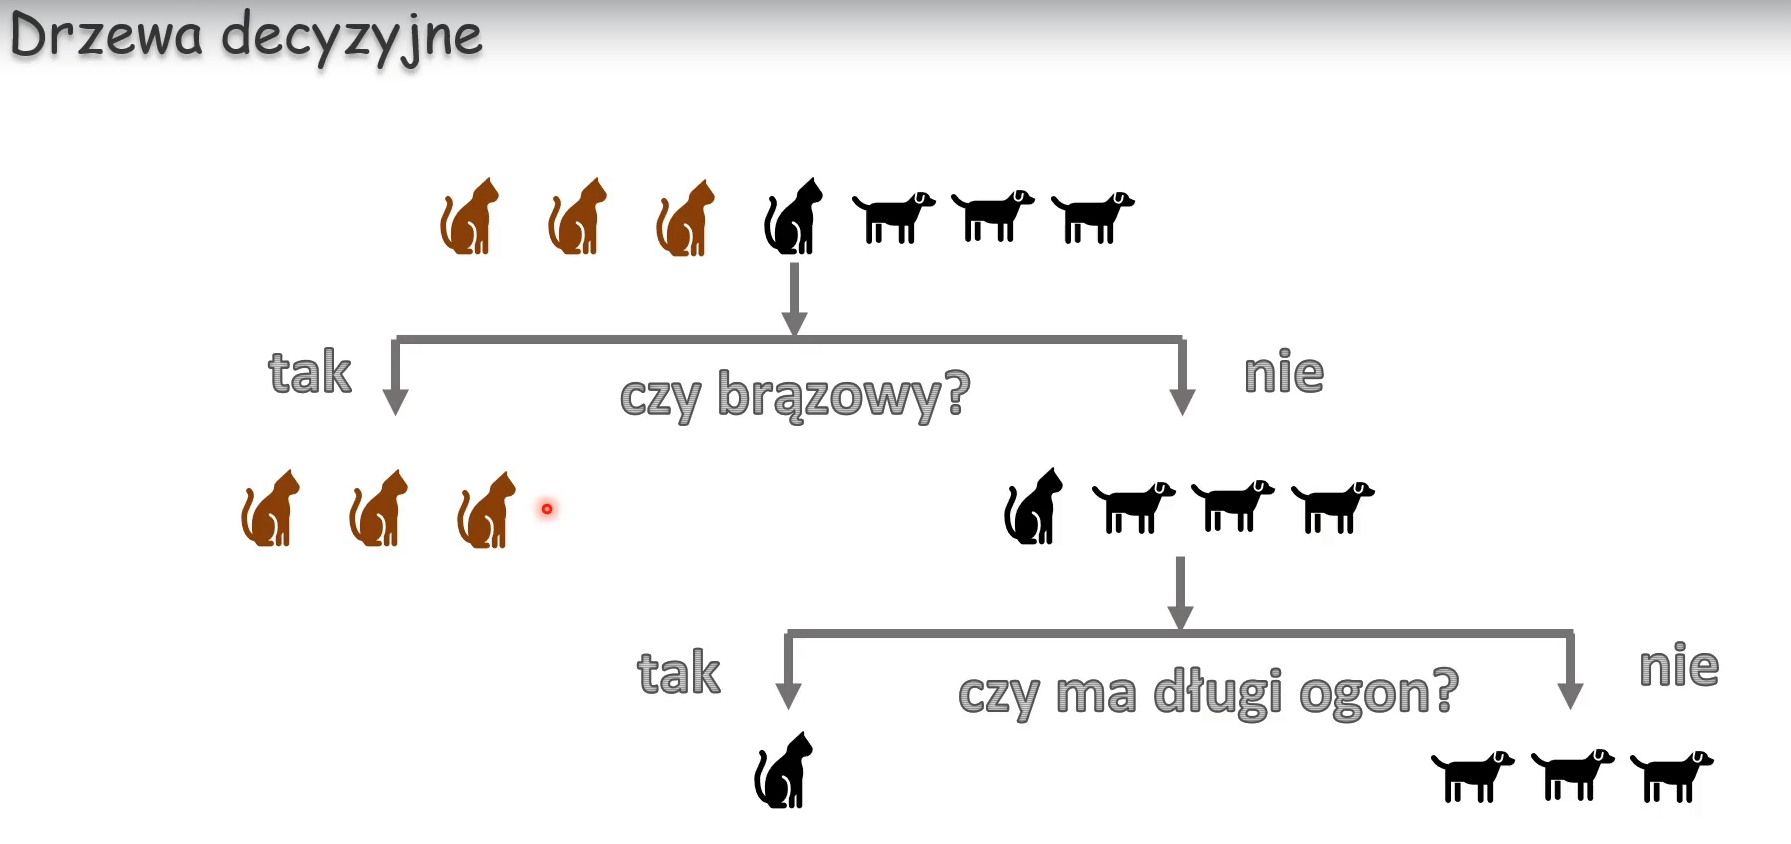

dane z K-najbliższych sąsiadów

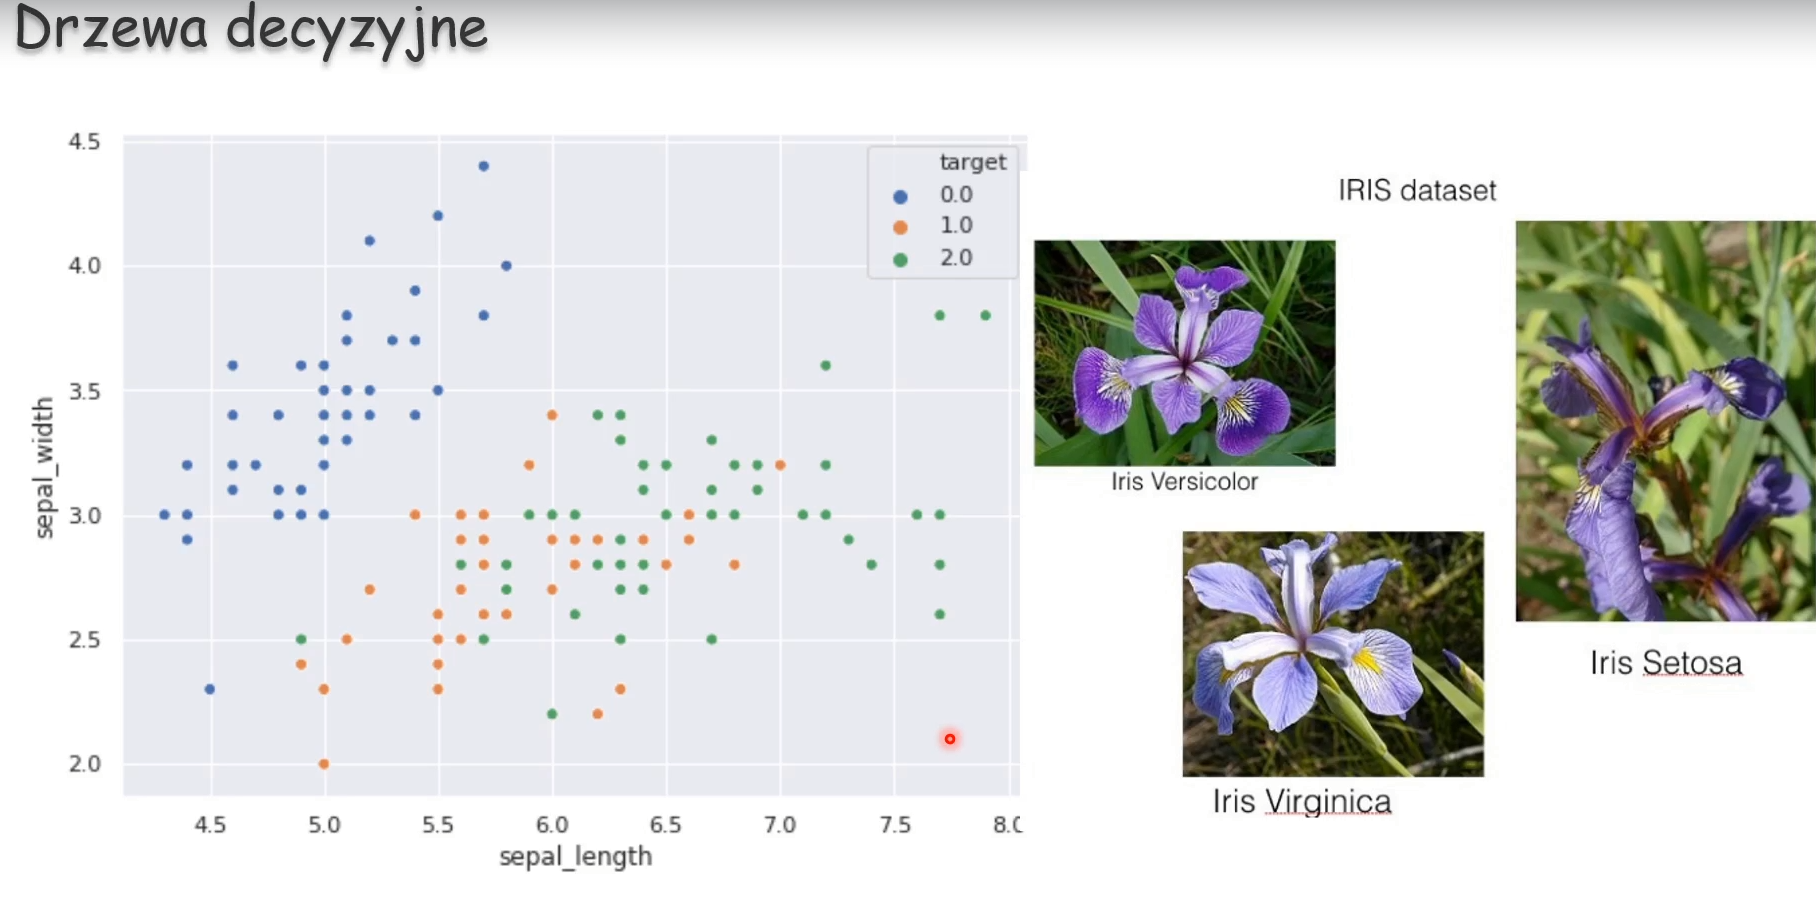

**Graf drzewa decyzyjnego**

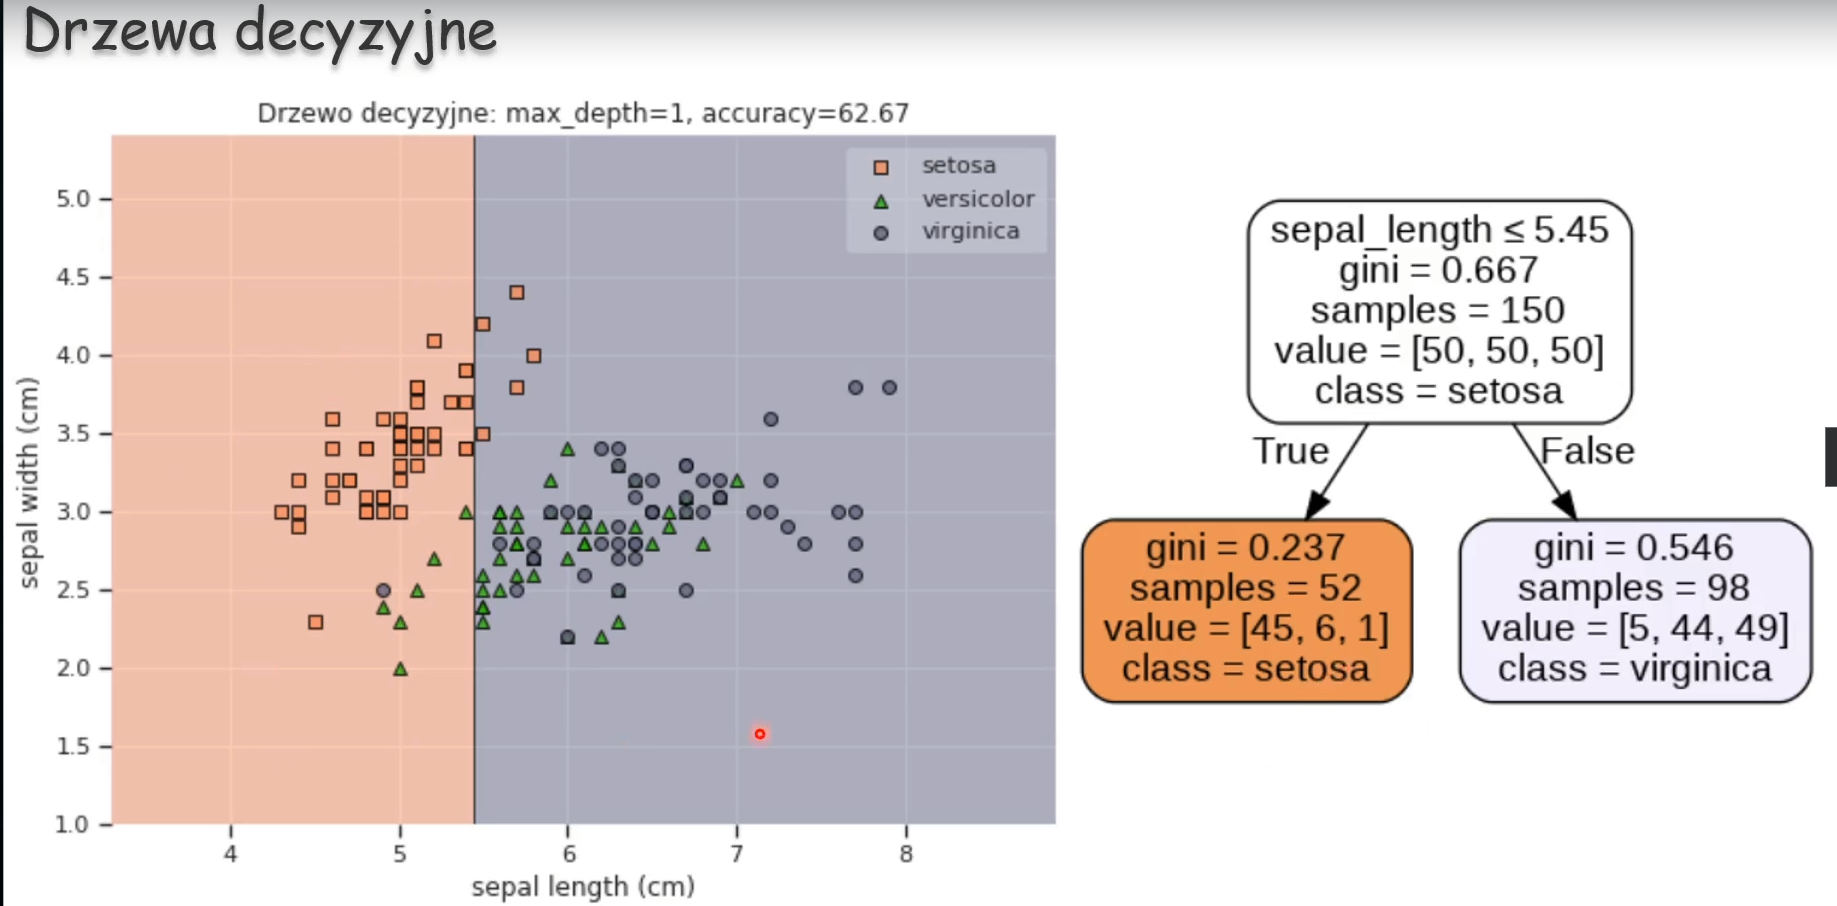

Podział kolejnego stopnia:
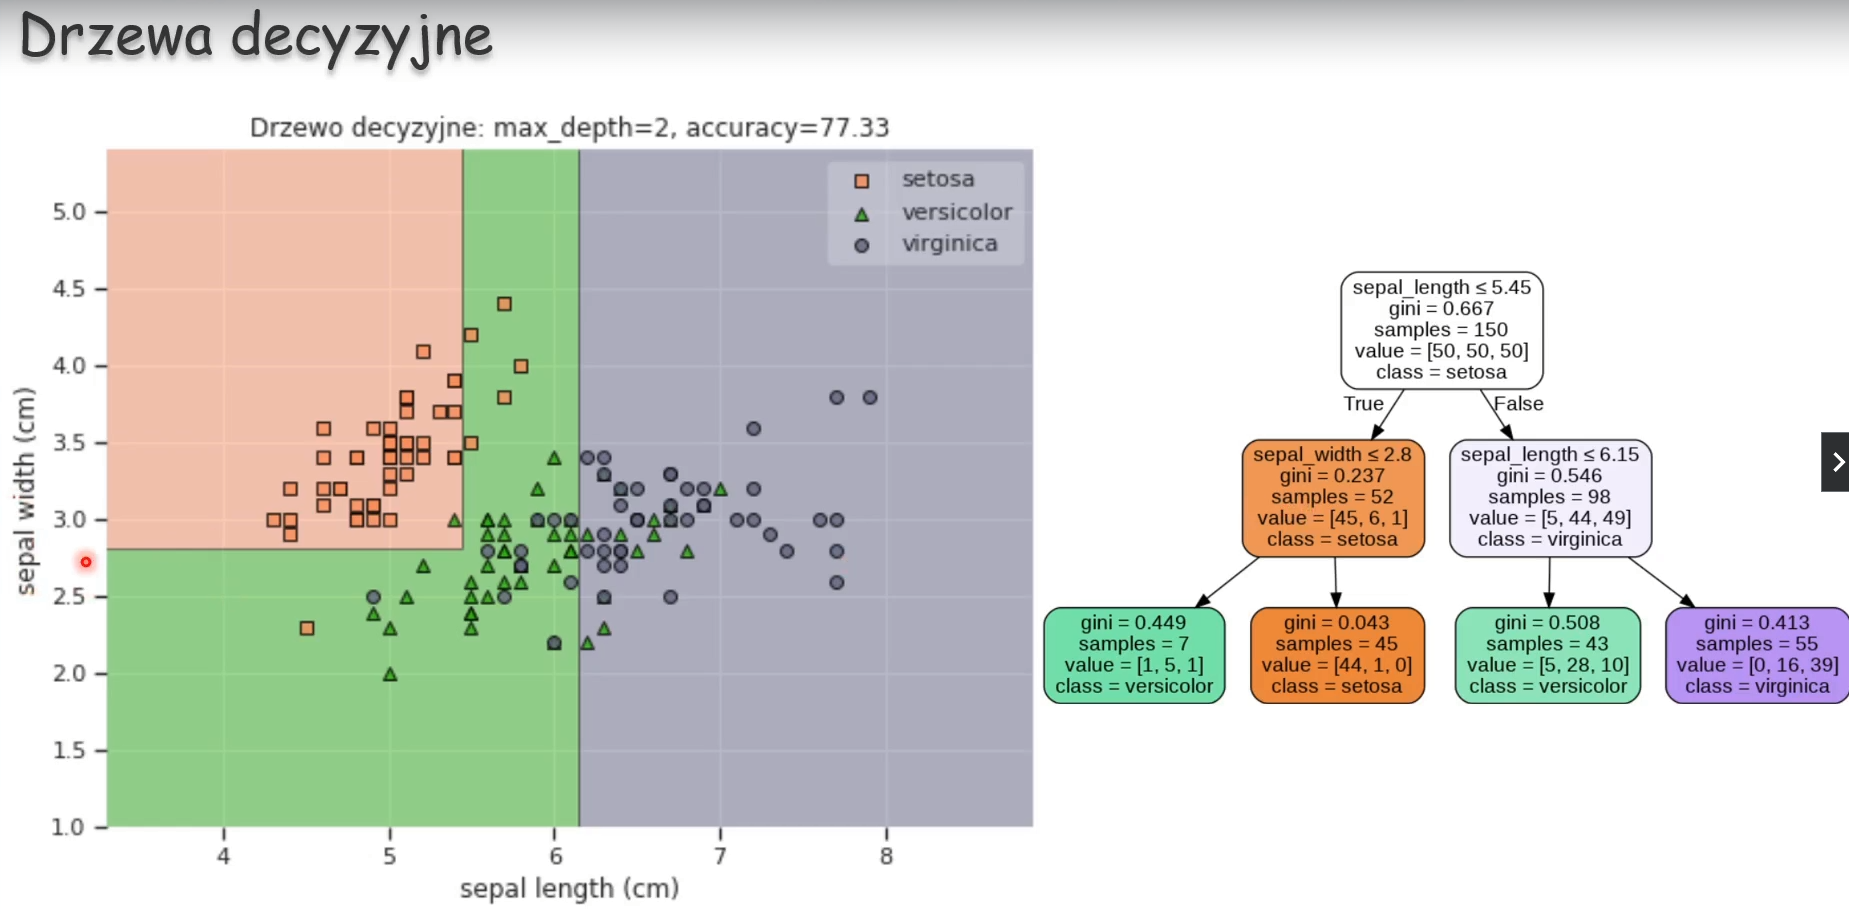

**kolejny podział** gini 0, nie można juz podzielic

Możemy ustalić ile ma być próbek na liściu - Nie warto ustawiać domyslnego podziału

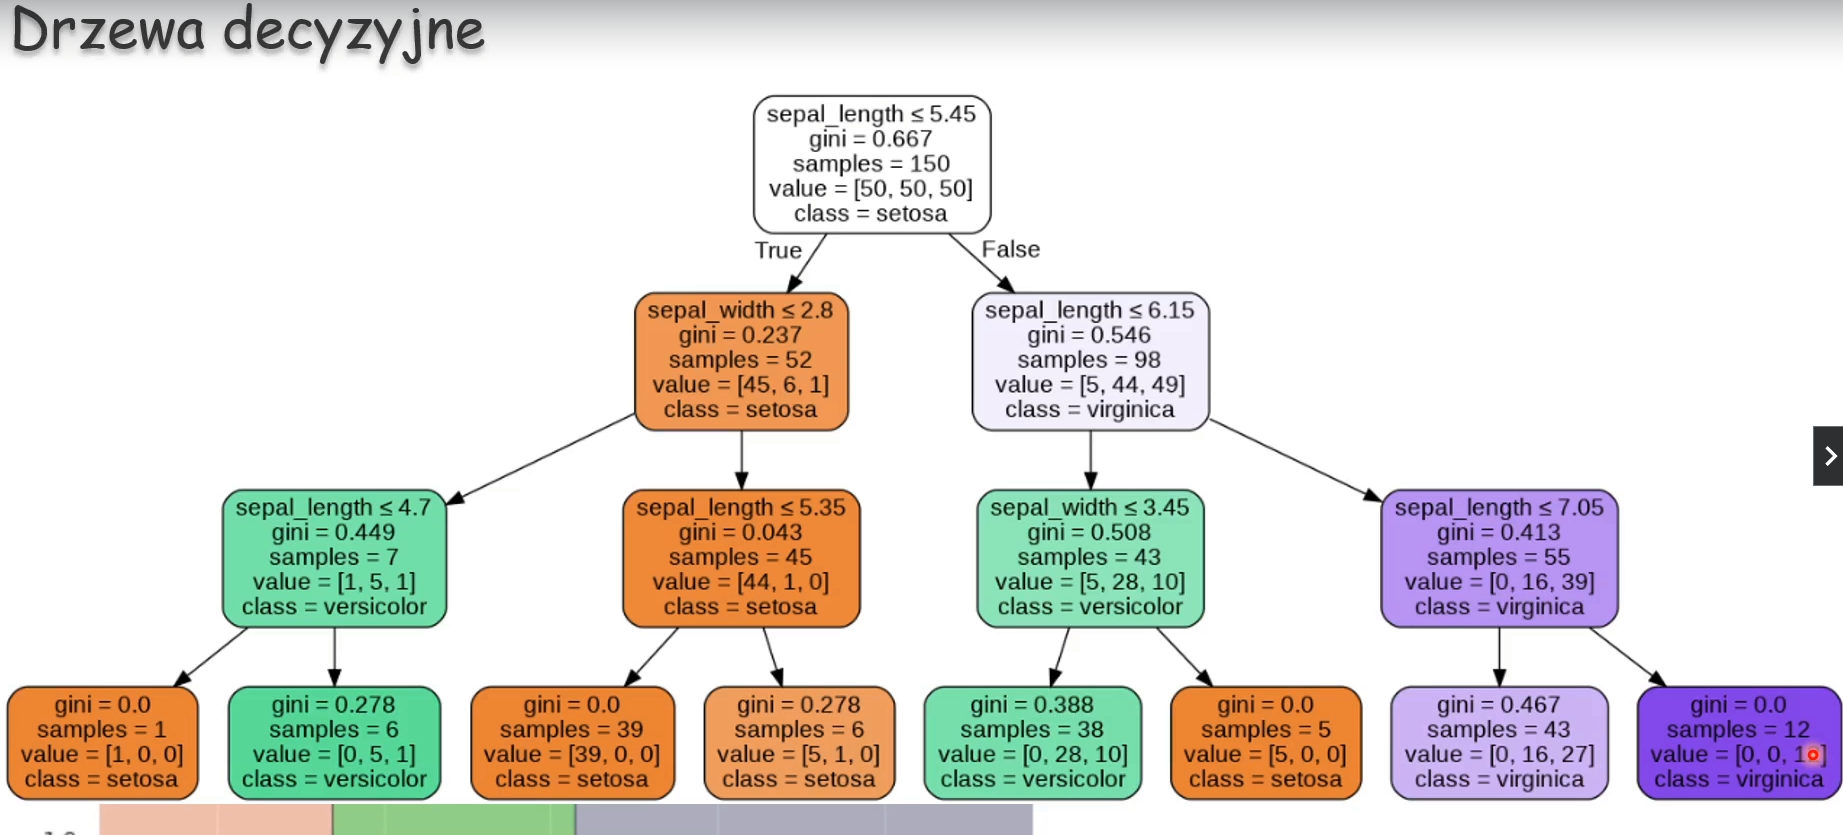

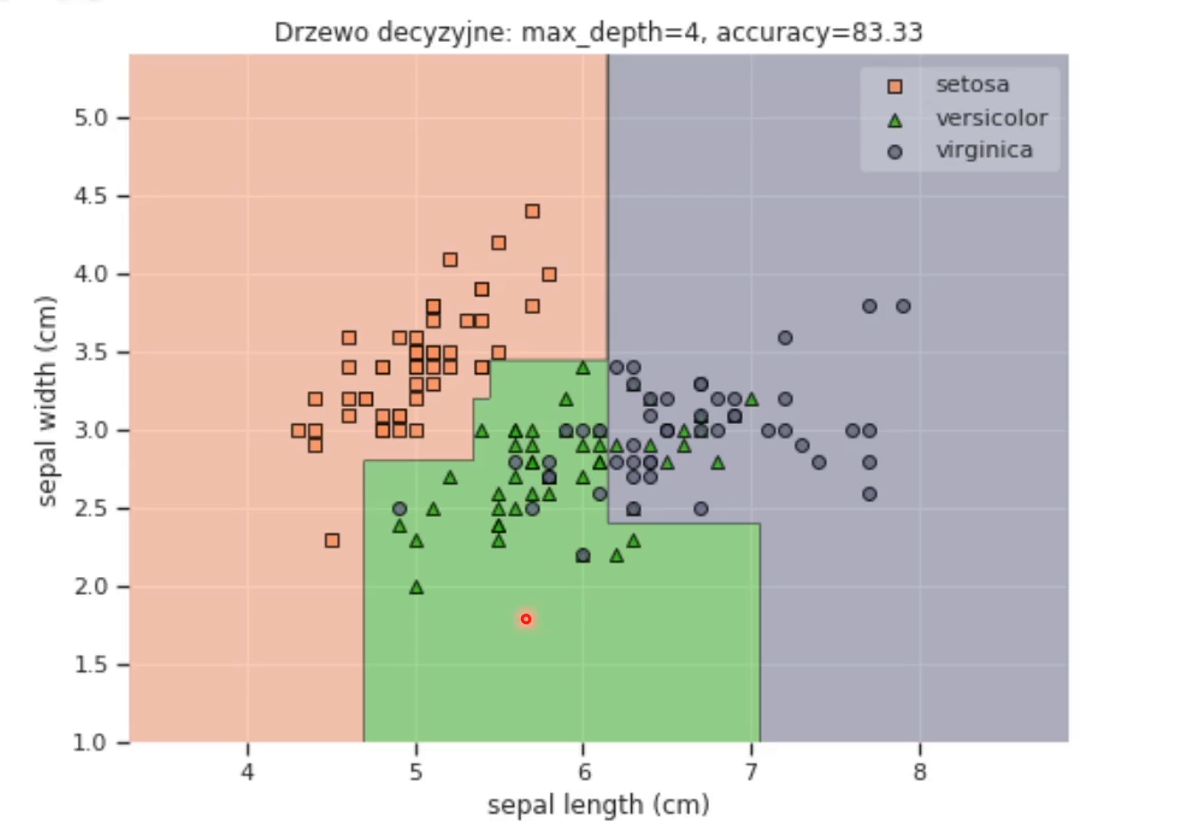

WYliczanie wskaźnike giniego: (mówi o czystości zbioru)

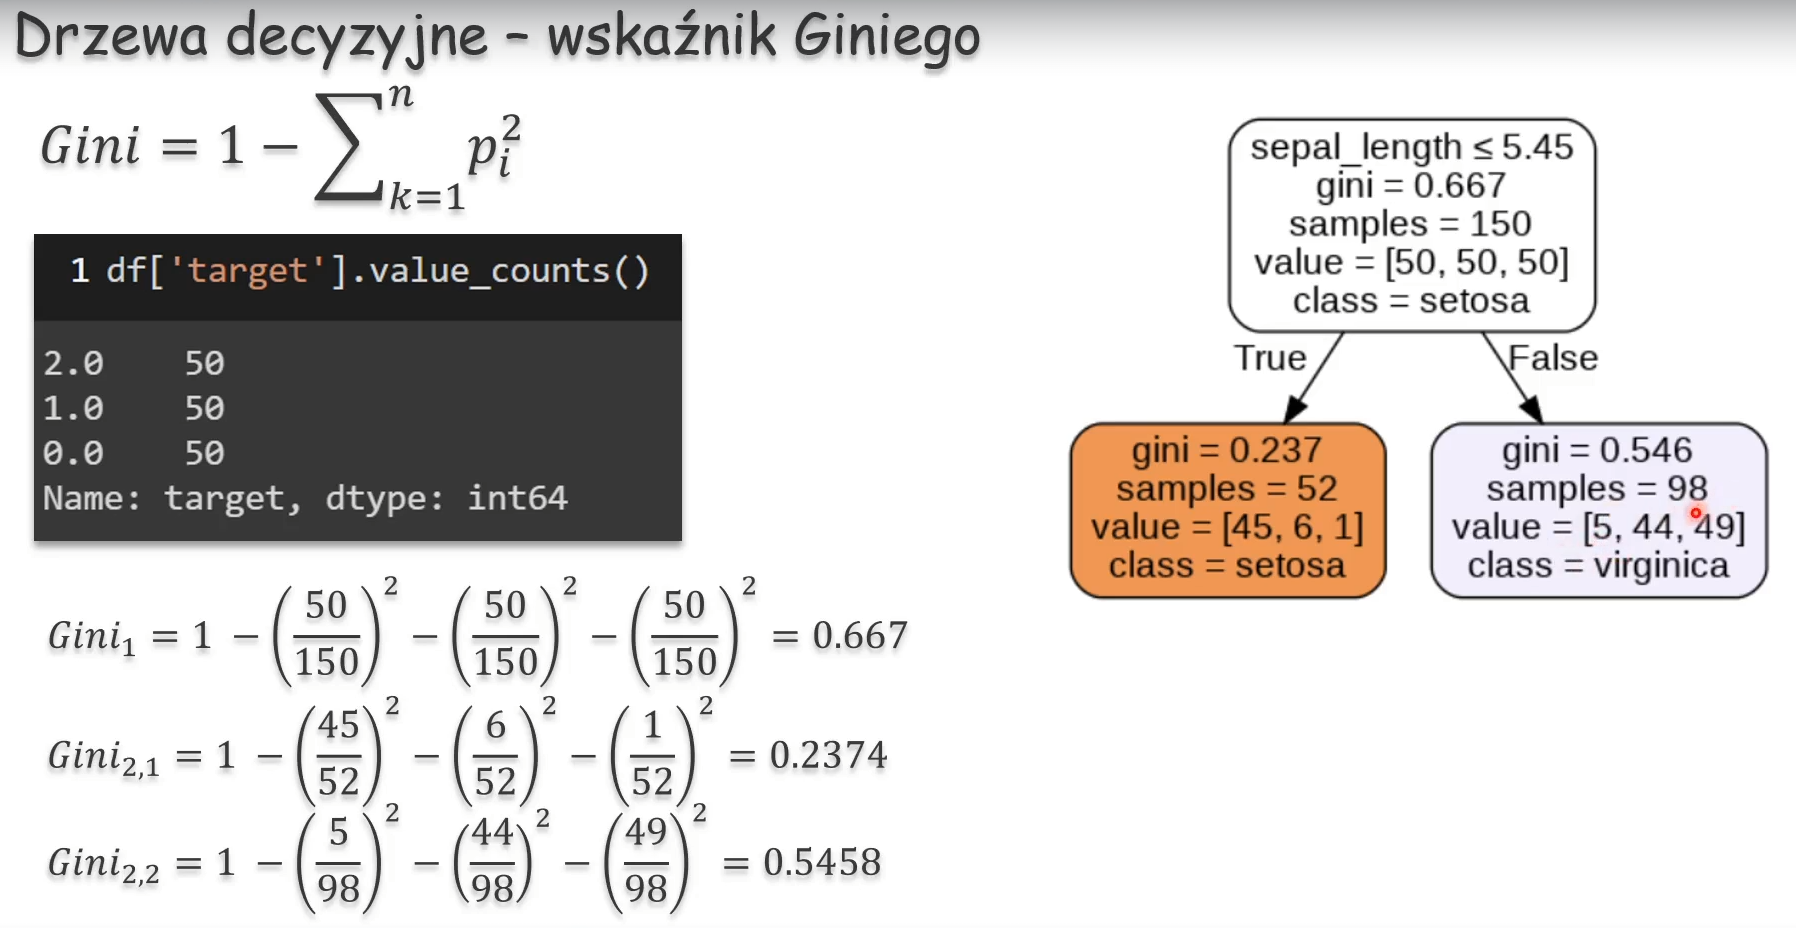

**Entriopia**  ogólnie powinny dawać takie same wyniki z małymi różnicami

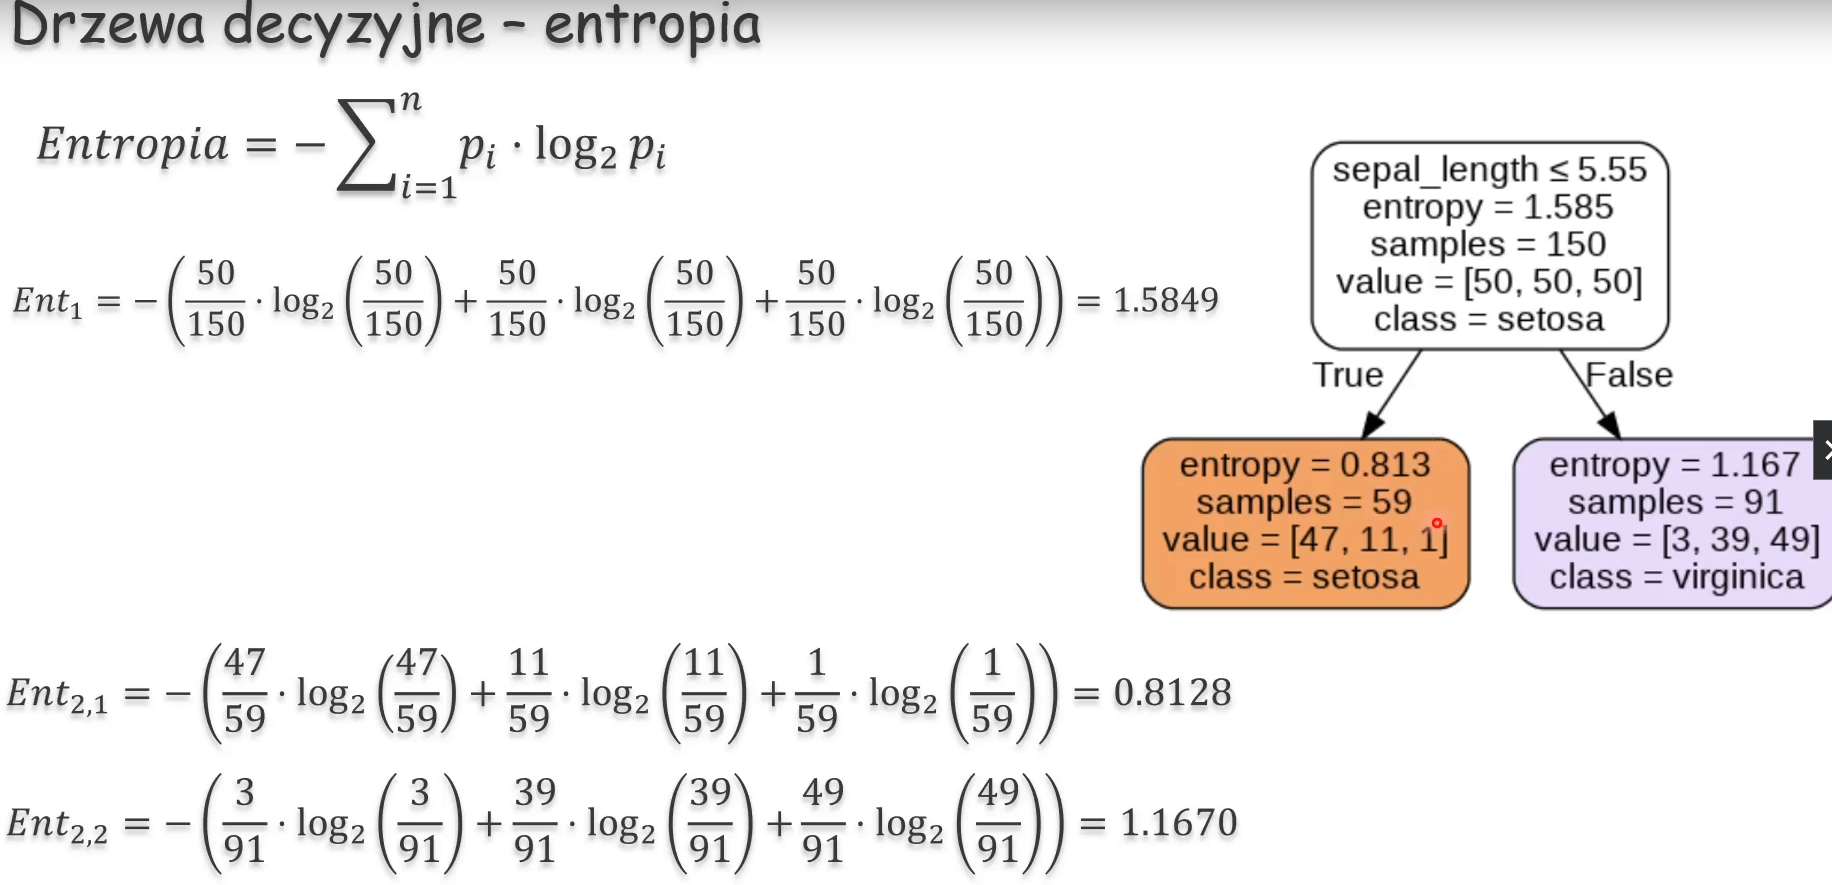

Algorytm drzew decyzyjnych działa do zmiejszenia entropii/ wskaźnikiego gimmiego tak abyśmy mieli jednorodne klasy

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
sns.set(font_scale=1.3)
np.random.seed(42)

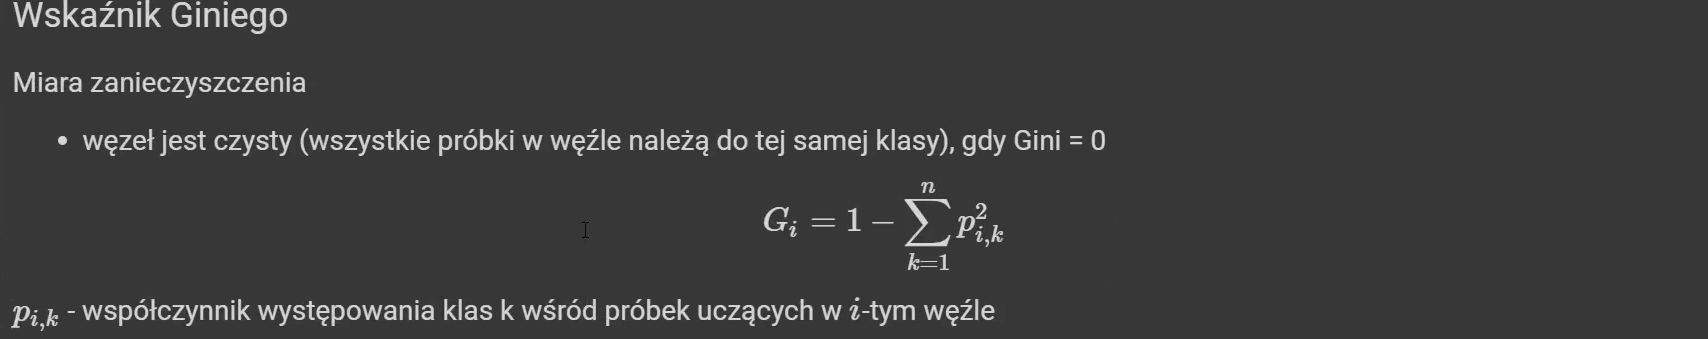

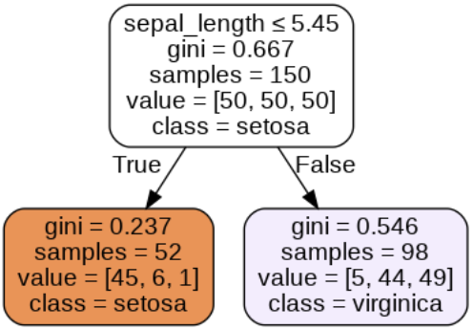

In [ ]:
Image('https://storage.googleapis.com/esmartdata-courses-files/ml-course/Picture1.png')

In [ ]:
#gin dla korzenia (root) - poziom 0
1 - (50/150)**2 - (50/150)**2 - (50/150)**2

0.6666666666666665

In [ ]:
#gin węzeł lewy - poziom 1
1 - (45/52)**2 - (6/52)**2 - (1/52)**2

0.23742603550295852

In [ ]:
#gin węzeł prawy - poziom 1
1 - (5/98)**2 - (44/98)**2 - (49/98)**2

0.5458142440649729

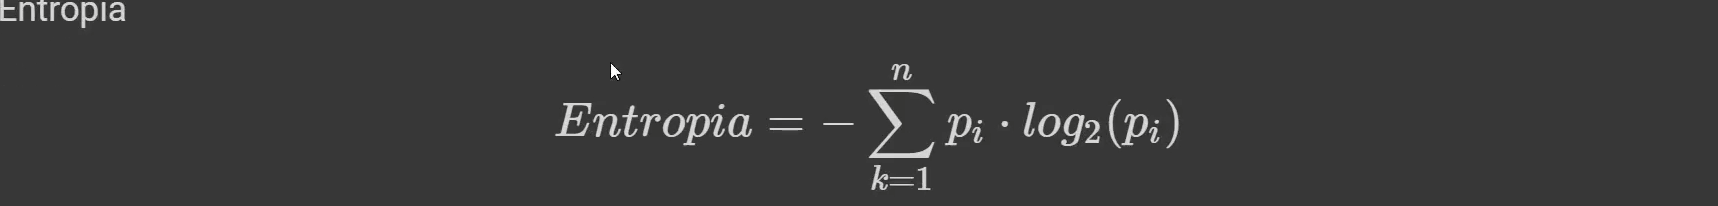

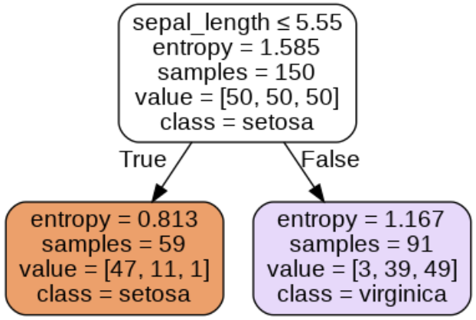

In [ ]:
Image('https://storage.googleapis.com/esmartdata-courses-files/ml-course/Picture2.png')

In [ ]:
#entropia dla korzenia (root) - poziom 0
-((50/150)*np.log2(50/150) + (50/150)*np.log2(50/150) + (50/150)*np.log2(50/150))

1.584962500721156

In [ ]:
#entropia węzeł lewy - poziom 1
-((47/59)*np.log2(47/59) + (11/59)*np.log2(11/59) + (1/59)*np.log2(1/59))

0.8128223064150747

In [ ]:
#entropia węzeł prawy - poziom 1
-((3/91)*np.log2(3/91) + (39/91)*np.log2(39/91) + (49/91)*np.log2(49/91))

1.167065448996099

In [ ]:
from scipy.stats import entropy

print(entropy([0.5, 0.5], base=2))
print(entropy([0.8, 0.2], base=2))
print(entropy([0.95, 0.05], base=2))

1.0
0.7219280948873623
0.2863969571159562


In [ ]:
def entropy(x):
  return -np.sum(x * np.log2(x))

print(entropy([0.5, 0.5]))
print(entropy([0.8, 0.2]))
print(entropy([0.95, 0.05]))

1.0
0.7219280948873623
0.28639695711595625


In [ ]:
#dane wynegerowane w postaci DataFrame, rozważamy jak wygląda entropia w zalezności od udziału klas
p = np.arange(0.01, 1.0, 0.01)
q = 1 - p
pq = np.c_[p,q]
pq[:10]

array([[0.01, 0.99],
       [0.02, 0.98],
       [0.03, 0.97],
       [0.04, 0.96],
       [0.05, 0.95],
       [0.06, 0.94],
       [0.07, 0.93],
       [0.08, 0.92],
       [0.09, 0.91],
       [0.1 , 0.9 ]])

In [ ]:
#liczymy jak wygląda entropia
entropies = [entropy(pair) for pair in pq]
entropies[:10]

[0.08079313589591118,
 0.14144054254182067,
 0.1943918578315762,
 0.24229218908241482,
 0.28639695711595625,
 0.32744491915447627,
 0.3659236509002231,
 0.4021791902022728,
 0.43646981706410287,
 0.4689955935892812]

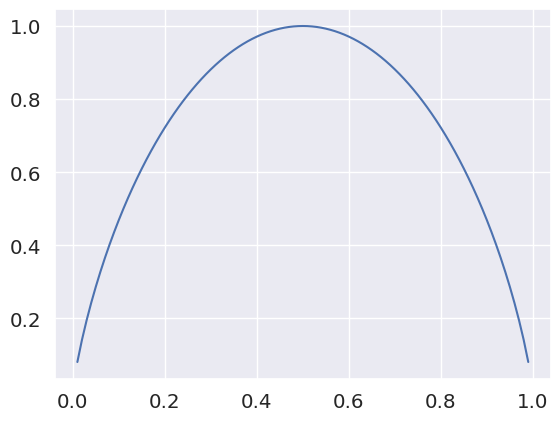

In [ ]:
plt.plot(p, entropies)



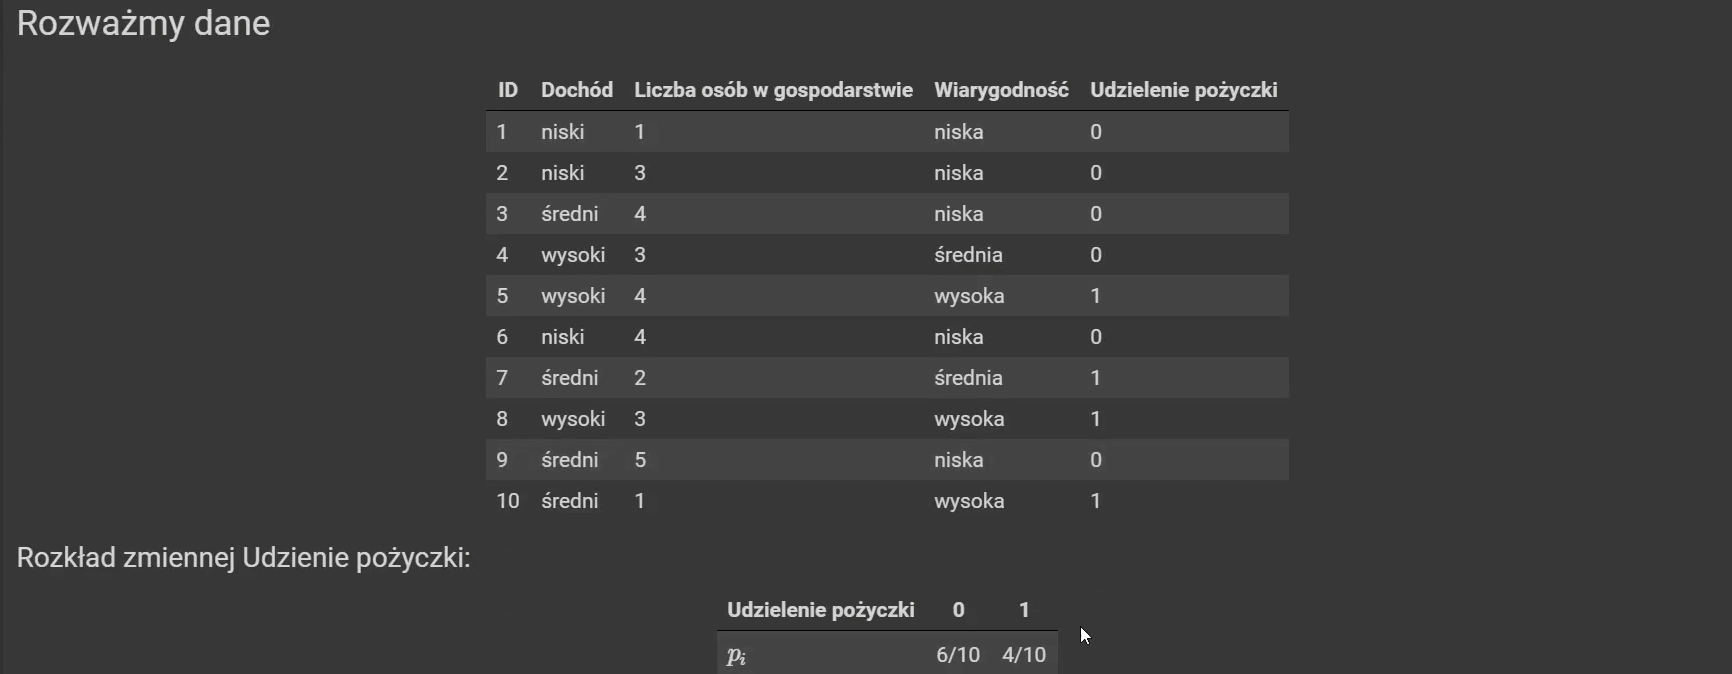```

```



In [20]:
entropia = -(6/10 * np.log2(6/10) + (4/10) * np.log2(4/10))
entropia

0.9709505944546686

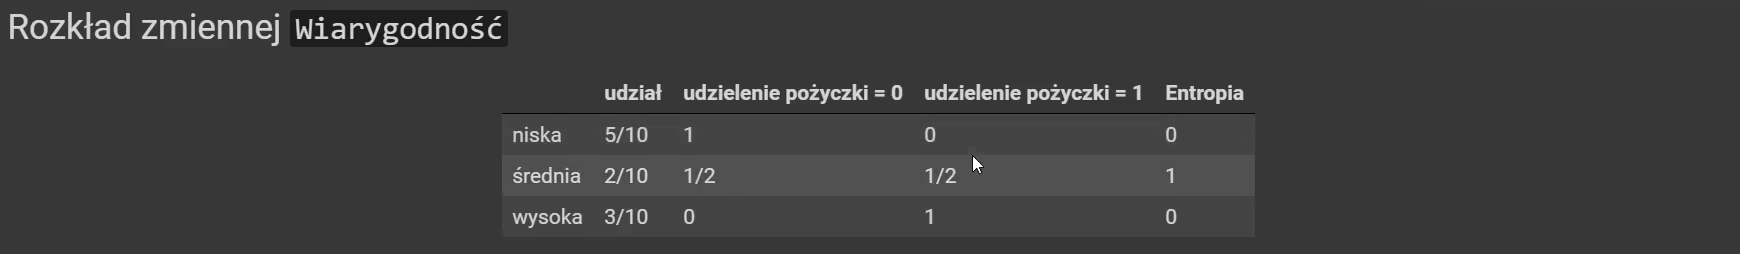

In [22]:
entropia_wiarygodnosc = 5/10 * 0 + 2/10 * 1 + 3/10 * 0
entropia_wiarygodnosc

0.2

0.2

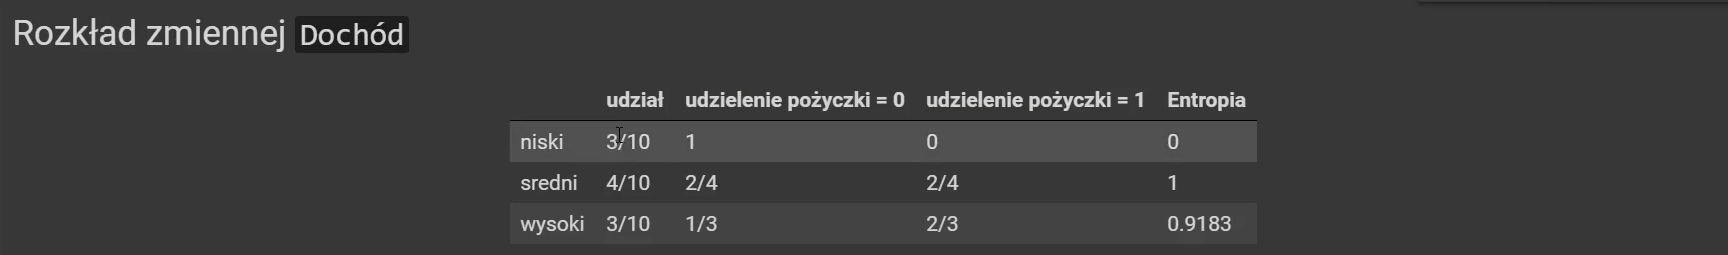

In [23]:
entropia_dochod = 3/10 * 0 + 4/10 * 1 + 3/10 * 0.9183
entropia_dochod

0.67549

# Zysk informacyjny

In [24]:
ig_wiarygodnosc = entropia - entropia_wiarygodnosc
ig_dochod = entropia - entropia_dochod

print('Zysk informacyjny (IG): wiarygoność:', ig_wiarygodnosc)
print('Zysk informacyjny (IG): dochód:', ig_dochod)

Zysk informacyjny (IG): wiarygoność: 0.7709505944546686
Zysk informacyjny (IG): dochód: 0.29546059445466855
